# Pregunta 4

#### Se tiene una partícula de masa m = 1 en una caja circular. Los radios de a y b son tales que b = 2a.

#### a) Realice una simulación en donde la partícula realiza varios rebotes en las paredes de la caja.  Suponga condiciones iniciales arbitrarias que le permitan hacer lo anterior.

In [3]:
from pylab import*
from numpy import*
%matplotlib inline

In [2]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    #el parámetro args está evaluándose en la segunda coordenada de la ecuación diferencial
    #éste escalar será la fricción que estamos añadiendo a la función.
    
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10.
    #codigo adicional para hacer que cuando se acerque al punto 
    #de rebote los pasos sean más pequeños y nunca sobrepase la barrera.
    
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    
    if args==0:
        for i in xrange(len(tiempos)-1): 
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h) 
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h) 
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h) 
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) 
            
    else:
        for i in xrange(len(tiempos)-1): 
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args) 
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args) 
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args) 
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) 
            
    return tiempos,sol

Las ecuaciones que describen a la partícula rebotando son las mismas que en el problema 3, entonces, las vamos a usar nuevamente:

In [4]:
#x[0]=posición_x, x[1]=posición_y, x[2]=vel_x, x[3]=vel_y

def ec_mov(x,t,g=9.8,m=1):
    dx= x[2]
    dy= x[3]
    ddy= -g/m
    ddx= 0
    return array([dx,dy,ddx,ddy])

Notemos que cuando una pelota rebota lo que ocurre es que la dirección de su velocidad se refleja con respecto a la normal de la superficie, entonces, en una caja circular, tendremos que:

$$
\text{Si } \ \ \ \vert \ \vec{r} \vert > b  \ \ \ \ \ \ \ \ \ \ \ \Rightarrow \ \ \ \ \ \ \ \ \ \ \ \vec{v}= -\dot{r}\hat{r} + \dot{\theta} \hat{\theta}
$$

$$
\text{Si } \ \ \ \vert \ \vec{r} \vert < a \ \ \ \ \ \ \ \ \ \ \ \ \Rightarrow \ \ \ \ \ \ \ \ \ \ \ \vec{v}= \dot{r}\hat{r} + \dot{\theta} \hat{\theta}
$$

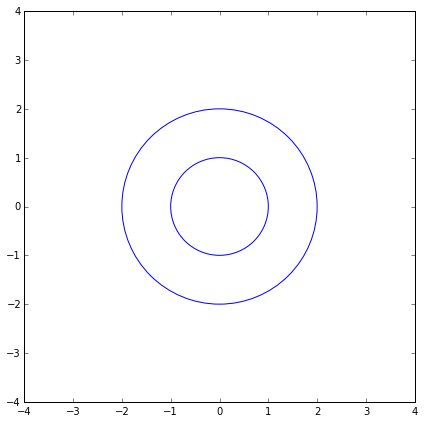

In [61]:
fig = figure(figsize=(7,7))
ylim([-4,4])
xlim([-4,4])
gca().set_aspect('equal', adjustable='box')
circle1=Circle((0,0),1,color='b', fill=False)
circle2=Circle((0,0),2,color='b', fill=False)
gcf().gca().add_artist(circle1)
gcf().gca().add_artist(circle2)
show()

#### (b) Existen condiciones iniciales que hagan que la partícula quede encasillada en sólo un sector dela caja?. De ser así muestre cuáles son tales condiciones o demuestre porque no se pueden obtener dicha situación.

#### (c) Si ahora se tiene un campo gravitacional uniforme $\vec{g} = 10 \hat{n}$. Que condiciones iniciales se tendrán que cumplir para que la partícula sólo pueda ocupar la mitad de la dona.